# New Categories Basic Testing

In [1]:
# Data Loading
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Splitting and Resampling
from sklearn.model_selection import train_test_split

# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Reports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Model
from sklearn import svm

# DATA PREP

In [2]:
# Read datasets
df = pd.read_csv('nmf_categories_apr17.csv')

# Drop any rows with null values
df = df.dropna()

In [3]:
# Lowercase categories
df['topic'] = df['topic'].str.lower()

# Recheck categories
print('og')
print(pd.unique(df['type']))
print()
print('nmf')
print(pd.unique(df['topic']))

og
['database' 'upgrade_services' 'elasticsearch' 'sendgrid' 'redis' 'fastly'
 'resources' 'upsize' 'deploy']

nmf
['database' 'database_admin' 'fastly' 'redis' 'resources'
 'upgrade_services' 'upsize' 'sendgrid' 'elasticsearch' 'deploy']


In [4]:
# Create a cross-tab for visualization
ct = pd.crosstab(df['type'], df['topic'])

ct

topic,database,database_admin,deploy,elasticsearch,fastly,redis,resources,sendgrid,upgrade_services,upsize
type,,,,,,,,,,
database,1400,754,4,18,13,245,170,18,30,12
deploy,161,59,3205,150,31,547,141,36,273,5
elasticsearch,14,9,0,1176,2,87,7,2,23,1
fastly,10,2,1,0,2226,116,2,214,7,0
redis,31,15,2,21,2,757,4,2,27,2
resources,44,190,1,14,10,89,1539,6,6,6
sendgrid,18,0,0,1,3,7,0,650,6,0
upgrade_services,71,51,2,729,1,35,2,0,931,1
upsize,34,5,3,29,6,63,74,2,95,2164


# Overlap Test

## OG/LDA

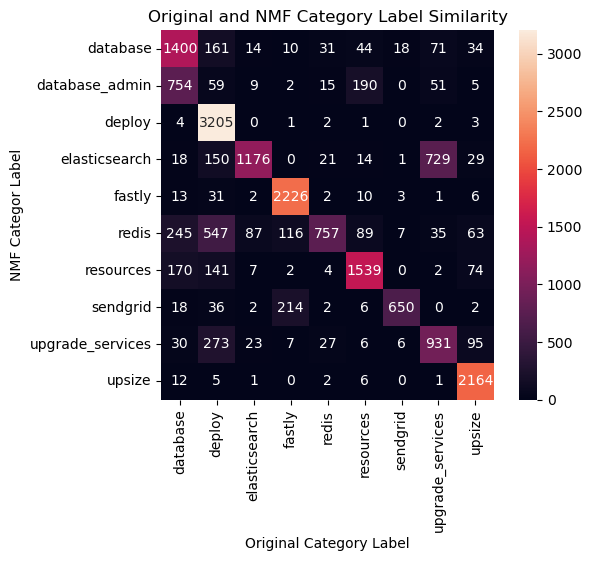

In [5]:
import matplotlib.colors as clr

cmap = clr.LinearSegmentedColormap.from_list("txstate_cmap", ['#ededed', '#501214'])

# Plot a confusion matrix
mat = ct
sns.heatmap(mat.T, square = True, annot=True, fmt = "d",
            xticklabels=['database','deploy','elasticsearch','fastly','redis','resources','sendgrid','upgrade_services','upsize'],
            yticklabels=['database','database_admin','deploy','elasticsearch','fastly','redis','resources','sendgrid','upgrade_services','upsize'])
plt.xlabel("Original Category Label")
plt.ylabel("NMF Categor Label")
plt.title('Original and NMF Category Label Similarity')
plt.show()

In [6]:
# Produce a classification report
print(classification_report(df['type'], df['topic']))

C:\Users\maxwe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

        database       0.79      0.53      0.63      2664
  database_admin       0.00      0.00      0.00         0
          deploy       1.00      0.70      0.82      4608
   elasticsearch       0.55      0.89      0.68      1321
          fastly       0.97      0.86      0.91      2578
           redis       0.39      0.88      0.54       863
       resources       0.79      0.81      0.80      1905
        sendgrid       0.70      0.95      0.80       685
upgrade_services       0.67      0.51      0.58      1823
          upsize       0.99      0.87      0.93      2475

        accuracy                           0.74     18922
       macro avg       0.68      0.70      0.67     18922
    weighted avg       0.84      0.74      0.77     18922



C:\Users\maxwe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maxwe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
# Produce a classification report
print(classification_report(df['topic'], df['type']))

C:\Users\maxwe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maxwe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maxwe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

        database       0.53      0.79      0.63      1783
  database_admin       0.00      0.00      0.00      1085
          deploy       0.70      1.00      0.82      3218
   elasticsearch       0.89      0.55      0.68      2138
          fastly       0.86      0.97      0.91      2294
           redis       0.88      0.39      0.54      1946
       resources       0.81      0.79      0.80      1939
        sendgrid       0.95      0.70      0.80       930
upgrade_services       0.51      0.67      0.58      1398
          upsize       0.87      0.99      0.93      2191

        accuracy                           0.74     18922
       macro avg       0.70      0.68      0.67     18922
    weighted avg       0.73      0.74      0.71     18922



In [8]:
labels = ['database','deploy','elasticsearch','fastly','redis','resources','sendgrid','upgrade_services','upsize']

for label in labels:
    temp = df.loc[df['topic'] == label]
    temp2 = temp.loc[df['type'] == label]
    print(f'Accuracy for {label}: {round(len(temp2)/len(temp),2)}')

Accuracy for database: 0.79
Accuracy for deploy: 1.0
Accuracy for elasticsearch: 0.55
Accuracy for fastly: 0.97
Accuracy for redis: 0.39
Accuracy for resources: 0.79
Accuracy for sendgrid: 0.7
Accuracy for upgrade_services: 0.67
Accuracy for upsize: 0.99


In [9]:
accuracies = [0.79,1,0.55,.97,.39,.79,.7,.67,.99]

lbl_accs = pd.DataFrame({'Label': labels, 'Percent Overlap': accuracies})

lbl_accs['Percent Overlap'] = lbl_accs['Percent Overlap']*100

lbl_accs = lbl_accs.set_index('Label')

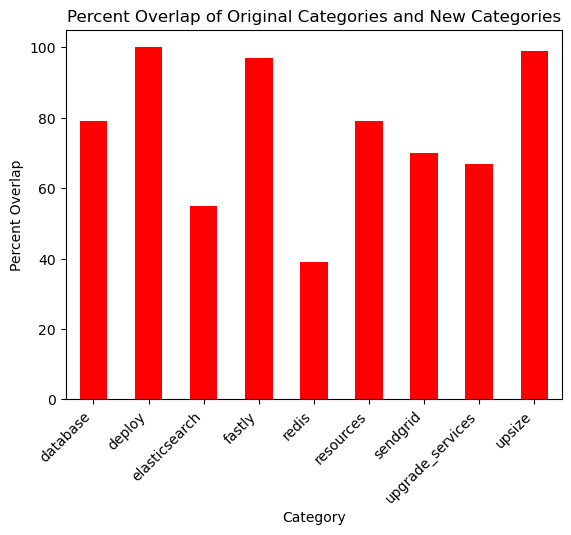

In [10]:
ax = lbl_accs.plot(kind='bar',
                title = 'Percent Overlap of Original Categories and New Categories',
                xlabel = 'Category', ylabel = 'Percent Overlap',
                color='red', legend=False)
plt.xticks(rotation=45,ha='right')
plt.ylim(0,105)
plt.show()